# 6.1.2 Hierarchical Clustering

### Explanation of Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. There are two main types of hierarchical clustering:

1. **Agglomerative Clustering**: Also known as the bottom-up approach, it starts with each observation as a single cluster and merges the clusters step-by-step until all observations are merged into a single cluster.
2. **Divisive Clustering**: Also known as the top-down approach, it starts with all observations in a single cluster and splits the clusters step-by-step until each observation is in its own cluster.

___
___
### Dendrograms

A dendrogram is a tree-like diagram that records the sequences of merges or splits in hierarchical clustering. It illustrates the arrangement of the clusters produced by hierarchical clustering.

- **Nodes**: Each leaf node represents a data point.
- **Branches**: The length of the branches represents the distance or dissimilarity between the clusters.
- **Height**: The vertical axis represents the distance at which clusters are merged or split. Shorter branches indicate clusters that are more similar.

#### Interpretation of Dendrograms

1. **Cutting the Dendrogram**: By setting a threshold on the dendrogram, we can cut it horizontally to form clusters. The height of the cut determines the number of clusters.
2. **Cluster Similarity**: Clusters that merge at lower heights are more similar than those merging at higher heights.
3. **Cluster Formation**: The dendrogram helps visualize how clusters are formed at each step and the level of similarity between different clusters.

___
___

### Scenarios where Hierarchical Clustering is Beneficial

1. **Understanding Data Structure**: Useful when the underlying data structure is hierarchical or nested.
2. **Small to Medium-Sized Datasets**: Works well with datasets that are not too large, as computational complexity can become an issue with very large datasets.
3. **Dendrogram Visualization**: Provides a clear visual representation (dendrogram) of how clusters are formed and merged, making it easy to interpret.
4. **No Prior Knowledge of Number of Clusters**: Does not require specifying the number of clusters in advance, which can be advantageous when the number of clusters is not known.

___
___
### Readings:
- [K-Means Clustering and Hierarchical Clustering](https://towardsdev.com/machine-learning-algorithms-14-k-means-clustering-and-hierarchical-clustering-46acc005057d)
- [Everything to know about Hierarchical Clustering; Agglomerative Clustering & Divisive Clustering.](https://medium.com/@chandu.bathula16/everything-to-know-about-hierarchical-clustering-agglomerative-clustering-divisive-clustering-badf31ae047)
- [Hierarchical Clustering : From Basic to Advanced](https://readmedium.com/mastering-hierarchical-clustering-from-basic-to-advanced-5e770260bf93)
- [Hierarchical Agglomerative Clustering Algorithm Example In Python](https://readmedium.com/en/https:/towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019)
- [Hierarchical Clustering](https://readmedium.com/en/https:/medium.com/ai-made-simple/hierarchical-clustering-d828ad1386dd)
___
___

## Methods for Implementing Hierarchical Clustering

### 1. Agglomerative Clustering
- #### Algorithm:
    Agglomerative clustering follows these steps:
    1. Start with each data point as a single cluster.
    2. Compute the distance (similarity) between every pair of clusters.
    3. Merge the two closest clusters.
    4. Repeat steps 2 and 3 until only one cluster remains.

- #### Formulas

    - **Distance Metrics**: Common metrics include Euclidean distance, Manhattan distance, and cosine similarity.
    - **Linkage Criteria**: Methods for calculating the distance between clusters, such as single linkage, complete linkage, average linkage, and Ward's method.

$$ d(A, B) = \min \{ d(a, b) : a \in A, b \in B \} \quad \text{(Single Linkage)} $$



$$ d(A, B) = \max \{ d(a, b) : a \in A, b \in B \} \quad \text{(Complete Linkage)} $$



$$ d(A, B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b) \quad \text{(Average Linkage)} $$



$$ d(A, B) = \sqrt{\frac{|A| \cdot |B|}{|A| + |B|} \left( \mu_A - \mu_B \right)^2} \quad \text{(Ward's Method)} $$

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

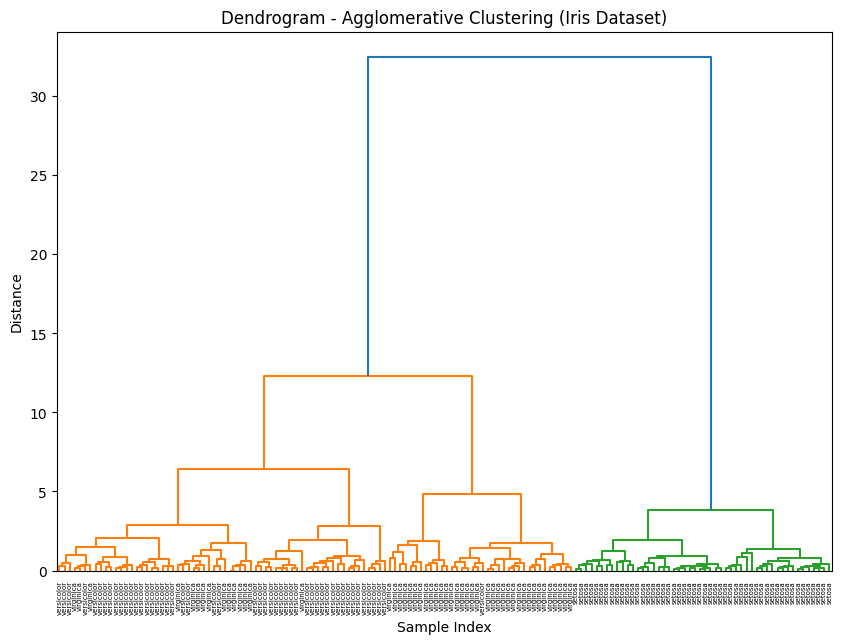

In [3]:
# Perform Agglomerative Clustering
linked = linkage(X, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target_names[y], distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

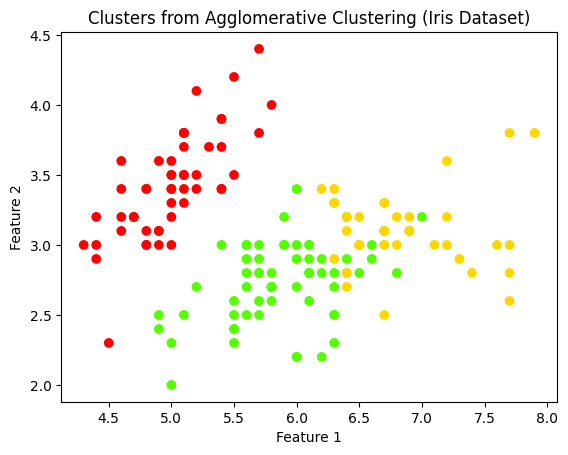

In [4]:
# Determine clusters by cutting the dendrogram at a specific height
# Choose a value from the Y-axis from the dendogram as a threshold
threshold = 10  # You can adjust this threshold
clusters = fcluster(linked, threshold, criterion='distance')
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')
plt.title('Clusters from Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

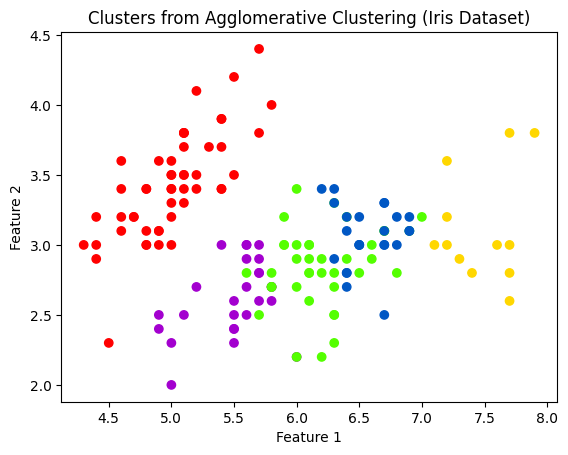

In [5]:
threshold = 4  
clusters = fcluster(linked, threshold, criterion='distance')
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='prism')
plt.title('Clusters from Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 2. Divisive Clustering
- #### Algorithm:
    Divisive clustering follows these steps:
    1. Start with all data points in a single cluster.
    2. Select the cluster to split.
    3. Compute the distance (dissimilarity) between points within the cluster.
    4. Split the cluster into two clusters.
    5. Repeat steps 2 to 4 until each data point is in its own cluster.

- #### Algorithms and Formulas

    - **Principal Components Analysis (PCA)**: Often used to identify the direction to split a cluster.
    - **k-means or k-medoids**: Algorithms can be used for splitting clusters.

$$ D(A) = \sum_{i,j \in A} d(i, j) \quad \text{(Dissimilarity within cluster A)} $$

$$ \text{Maximize} \quad \frac{1}{2} \sum_{i,j} d(i, j) - \sum_{i \in A} \sum_{j \in B} d(i, j) \quad \text{(Split Criterion)} $$

In [6]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [8]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [9]:
# Apply K-means to divide the cluster
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
labels = kmeans.fit_predict(X_pca)

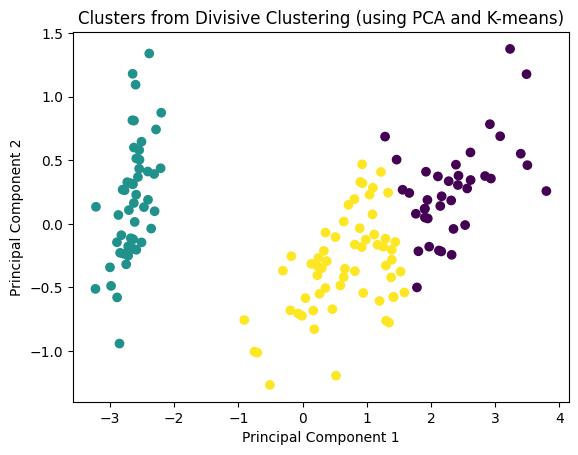

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clusters from Divisive Clustering (using PCA and K-means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

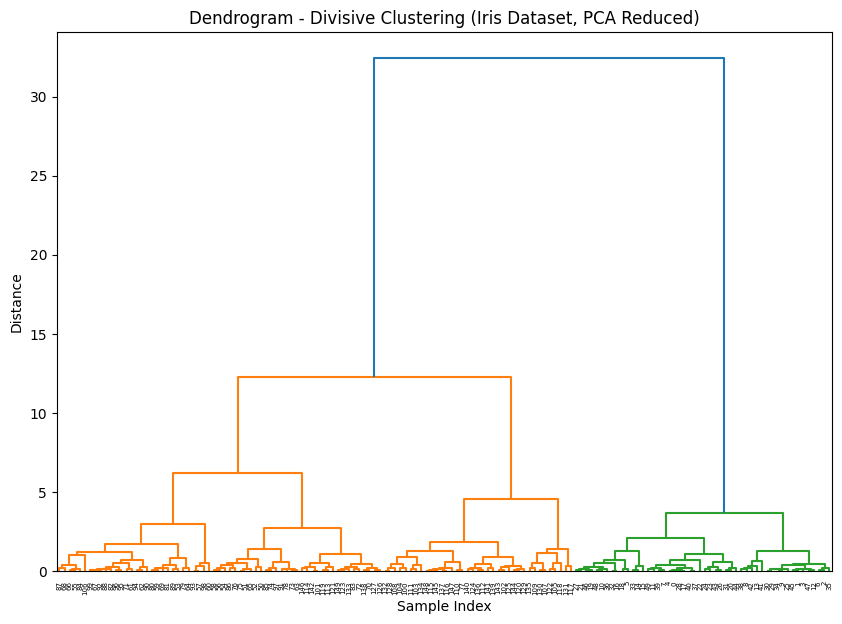

In [11]:
# Perform Agglomerative Clustering on PCA results to visualize hierarchical splitting
linked = linkage(X_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram - Divisive Clustering (Iris Dataset, PCA Reduced)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

## Conclusion

Hierarchical clustering is a versatile and powerful technique for cluster analysis, providing a hierarchical structure that can be particularly useful for understanding the data's underlying structure. Agglomerative clustering, with its bottom-up approach, is commonly used due to its simplicity and effectiveness. Divisive clustering, while less common, offers a top-down approach that can be useful in specific scenarios.

Dendrograms are essential tools in hierarchical clustering, offering a visual representation of the clustering process. They allow for easy interpretation and understanding of how clusters are formed and merged. By analyzing the dendrogram, we can determine the optimal number of clusters and understand the similarity between different clusters.

When implementing hierarchical clustering, it's essential to choose appropriate distance metrics and linkage criteria to ensure accurate and meaningful clustering results. This method is particularly beneficial when dealing with datasets where the number of clusters is unknown or when a hierarchical structure is inherent in the data.
